<a href="https://colab.research.google.com/github/albertopv/Fisica-de-las-Oscilaciones/blob/main/Oscilaciones_Forzadas_Masa_Resorte_analitica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Oscilaciones Forzadas en un Sistema Masa-Resorte**

El sistema está descrito por la ecuación diferencial:

$m\frac{d^2x}{dt^2}+ b \frac{dx}{dt}+kx = F_0\cos(ω_d t)$, $\quad$ (1)

donde:

•	$m:$ es la masa,

•	$b:$ es el coeficiente de amortiguamiento,

•	$k:$ es la constante elástica,

•	$F_0:$ es la amplitud de la fuerza externa,

•	$\omega_d:$ es la frecuencia angular de la fuerza externa,

•	$x:$ es la posición de la masa.




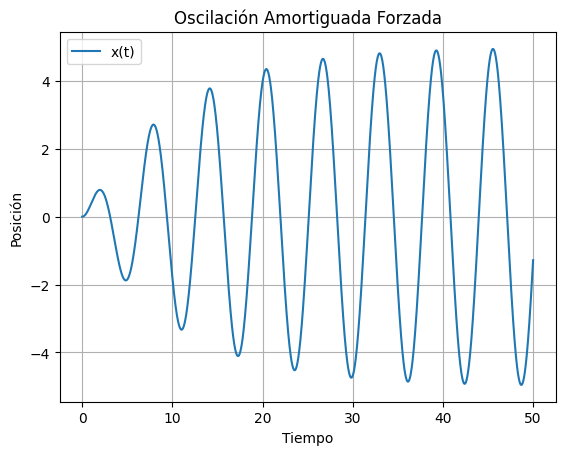

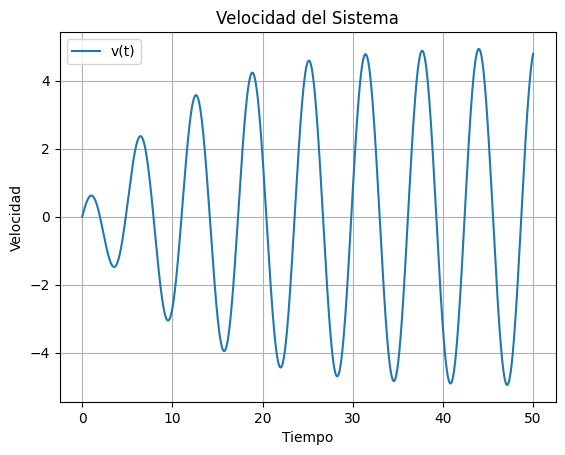

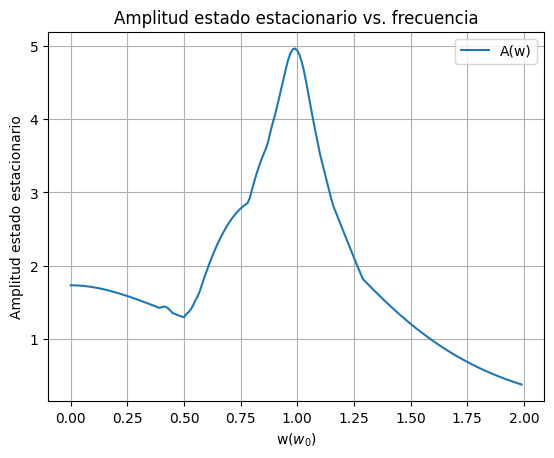

W_max_num =  0.99


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def ecuacion_diferencial(t, y, m, b, k, F0, w):
    """
    Función que define el sistema de ecuaciones diferenciales de segundo orden
    para la oscilación amortiguada forzada de un sistema masa-resorte.

    Parámetros
    ----------
    t : float
        Tiempo.
    y : list o array
        y[0] = x(t) (posición)
        y[1] = v(t) (velocidad)
    m : float
        Masa.
    b : float
        Coeficiente de amortiguamiento.
    k : float
        Constante elástica.
    F0 : float
        Amplitud de la fuerza externa.
    w : float
        Frecuencia angular de la fuerza externa.

    Retorna
    -------
    dydt : list
        [v(t), a(t)] la derivada de la posición (velocidad) y la aceleración.
    """
    x, v = y
    dxdt = v
    dvdt = (F0*np.cos(w*t) - b*v - k*x) / m
    return [dxdt, dvdt]

# Parámetros del sistema
m = 1.0      # masa
b = 0.2      # coeficiente de amortiguamiento
k = 1.0      # constante elástica
F0 = 1.0     # amplitud de la fuerza externa
w = 1.0      # frecuencia angular de la fuerza externa

# Condiciones iniciales
x0 = 0.0     # posición inicial
v0 = 0.0     # velocidad inicial

# Intervalo de tiempo para la simulación
t_inicio = 0.0
t_final = 50.0

# Resolución (número de puntos)
num_puntos = 2000
t_eval = np.linspace(t_inicio, t_final, num_puntos)

# Llamada al solucionador
sol = solve_ivp(ecuacion_diferencial,
                [t_inicio, t_final],
                [x0, v0],
                t_eval=t_eval,
                args=(m, b, k, F0, w))

# Extraer soluciones
t_vals = sol.t
x_vals = sol.y[0]
v_vals = sol.y[1]

# Graficar la posición en función del tiempo
plt.figure()
plt.plot(t_vals, x_vals, label='x(t)')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.title('Oscilación Amortiguada Forzada')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la velocidad en función del tiempo
plt.figure()
plt.plot(t_vals, v_vals, label='v(t)')
plt.xlabel('Tiempo')
plt.ylabel('Velocidad')
plt.title('Velocidad del Sistema')
plt.legend()
plt.grid(True)
plt.show()

#Amplitud estado estacionario vs. frecuencia w
A=[]
w_vec = np.arange(0.0, 2.0, 0.01) * np.sqrt(k/m)
for w in w_vec:
    sol = solve_ivp(ecuacion_diferencial,
                    [t_inicio, t_final],
                    [x0, v0],
                    t_eval=t_eval,
                    args=(m, b, k, F0, w))
    # Append the max value to the list A
    A.append(max(sol.y[0]))


plt.figure()
plt.plot(w_vec, A, label='A(w)')
plt.xlabel('w($w_0$)')
plt.ylabel('Amplitud estado estacionario')
plt.title('Amplitud estado estacionario vs. frecuencia')
plt.legend()
plt.grid(True)
plt.show()

# valor maximo de w
pos_A = np.argmax(A)
W_max_num = w_vec[pos_A]
print('W_max_num = ', W_max_num)
